In [106]:
import pandas as pd\

import numpy as np

from tqdm import tqdm_notebook,tqdm

from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, recall_score

# Exercise 1

In [74]:
# a)

college=pd.read_csv('College.csv')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [75]:
# b)

college['Private']=college['Private'].replace({'Yes':0, 'No':1}).astype(int)

In [76]:
# c)

X = college[['Private', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
'Personal', 'S.F.Ratio', 'Grad.Rate']]
y = college['Apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
# d)
lm_md=make_pipeline(MinMaxScaler(), LinearRegression()).fit(X_train, y_train)
lm_pred=lm_md.predict(X_test)
lm_mse=mean_squared_error(y_test, lm_pred)
print("The mse of the linear model is",lm_mse)

The mse of the linear model is 2216860.0490200273


In [ ]:
# e)
ridge_lambda=list()
alphas_to_use=np.linspace(0.001, 100, num = 100)
for i in tqdm(range(0,100)):
    kf=KFold(n_splits=5, shuffle=True, random_state=i)
    ridge_cv=Pipeline([('scaler', MinMaxScaler()),
                       ('model', RidgeCV(alphas=alphas_to_use,
                                        cv=kf.split(X_train)))]).fit(X_train, y_train)
    ridge_lambda.append(ridge_cv.named_steps['model'].alpha_)
pd.DataFrame(ridge_lambda).value_counts()

In [81]:
# e)
ridge_lambda=list()
alphas_to_use=np.linspace(0.001, 100, num = 100)
kf=KFold(n_splits=5, shuffle=True, random_state=i)
ridge_cv=Pipeline([('scaler', MinMaxScaler()),
                    ('model', RidgeCV(alphas=alphas_to_use,
                                    cv=kf.split(X_train)))]).fit(X_train, y_train)
ridge_lambda.append(ridge_cv.named_steps['model'].alpha_)
pd.DataFrame(ridge_lambda).value_counts()

1.011091    1
Name: count, dtype: int64

In [82]:
# e) (continued...)
## Using alpha 1.011091

ridge_md=make_pipeline(MinMaxScaler(), Ridge(alpha=1.011091)).fit(X_train,y_train)
ridge_pred=ridge_md.predict(X_test)
ridge_mse=mean_squared_error(y_test, ridge_pred)
print('The Ridge model mse is', ridge_mse)

The Ridge model mse is 2333139.9072945258


In [83]:
# f)
kf=KFold(n_splits=5, shuffle=True, random_state=i)
lasso_cv=Pipeline([('scaler', MinMaxScaler()),
                   ('model', LassoCV(alphas=np.linspace(0.001, 100, num=100), cv=kf.split(X_train)))]).fit(X_train, y_train)
lasso_lambda=lasso_cv.named_steps['model'].alpha_
lasso_md=Pipeline([('scaler', MinMaxScaler()),
                   ('model', Lasso(alpha=lasso_lambda))]).fit(X_train, y_train)
lasso_md_pred=lasso_md.predict(X_test)
lasso_mse=mean_squared_error(y_test,lasso_md_pred)
print('The Lasso model mse is', lasso_mse)


The Lasso model mse is 2281637.325395038


  g)

  Given the outputs:

  "The mse of the linear model is 2216860.0490200273

  The Ridge model mse is 2333139.9072945258
  
  The Lasso model mse is 2281637.325395038"

  I would use the linear model to predict the number of applications that a university receives.

# Exercise 2

In [91]:
# a)

telecom_train=pd.read_csv('churn-bigml-80.csv')
telecom_test=pd.read_csv('churn-bigml-20.csv')

In [92]:
# b)

telecom_train['Churn']=telecom_train['Churn'].astype(str)
telecom_test['Churn']=telecom_test['Churn'].astype(str)
telecom_train['Churn']=telecom_train['Churn'].replace({'True': 1, 'False': 0})
telecom_test['Churn']=telecom_test['Churn'].replace({'True': 1, 'False': 0})

telecom_train['International_plan']=telecom_train['International_plan'].replace({'Yes': 1, 'No': 0})
telecom_test['International_plan']=telecom_test['International_plan'].replace({'Yes': 1, 'No': 0})

telecom_train['Voice_mail_plan']=telecom_train['Voice_mail_plan'].replace({'Yes': 1, 'No': 0})
telecom_test['Voice_mail_plan']=telecom_test['Voice_mail_plan'].replace({'Yes': 1, 'No': 0})

telecom_train['Voice_mail_plan']=telecom_train['Voice_mail_plan'].replace({'Yes': 1, 'No': 0})
telecom_test['Voice_mail_plan']=telecom_test['Voice_mail_plan'].replace({'Yes': 1, 'No': 0})

telecom_train['Voice_mail_plan']=telecom_train['Voice_mail_plan'].replace({'Yes': 1, 'No': 0})
telecom_test['Voice_mail_plan']=telecom_test['Voice_mail_plan'].replace({'Yes': 1, 'No': 0})

telecom_train['total_charge']=telecom_train[['Total_day_charge','Total_eve_charge','Total_night_charge','Total_intl_charge']].sum(axis=1)
telecom_test['total_charge']=telecom_test[['Total_day_charge','Total_eve_charge','Total_night_charge','Total_intl_charge']].sum(axis=1)

In [93]:
# c)

telecom_train=telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]
telecom_test=telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]

In [94]:
# d)

# 1)
X=telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
y=telecom_train[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [101]:
# d)

# 2)

lasso_coef = []
for i in tqdm(range(0, 1000)):
    kf = KFold(n_splits=5, shuffle=True, random_state=i)
    y_train_1d=y_train.to_numpy().ravel()
    lasso_cv = Pipeline([('scaler', MinMaxScaler()),
                        ('model', LassoCV(cv=kf))]).fit(X_train, y_train_1d)
    lasso_lambda = lasso_cv.named_steps['model'].alpha_
    lasso_md = Pipeline([('scaler', MinMaxScaler()),
                        ('model', Lasso(alpha=lasso_lambda))]).fit(X_train, y_train_1d)
    lasso_coef.append(lasso_md.named_steps['model'].coef_)

lasso_coef = pd.DataFrame(lasso_coef)
lasso_coef.columns = X_train.columns.tolist()
lasso_coef.head()


100%|██████████| 1000/1000 [00:57<00:00, 17.37it/s]


,Account_length,International_plan,Voice_mail_plan,total_charge,Customer_service_calls
0,0.042982,0.310651,-0.077691,0.487594,0.546110
1,0.043373,0.310778,-0.077745,0.488180,0.546686
2,0.043373,0.310778,-0.077745,0.488180,0.546686
3,0.042982,0.310651,-0.077691,0.487594,0.546110
4,0.043373,0.310778,-0.077745,0.488180,0.546686


In [105]:
# d) 

# ii) (continued...)
telecom_train.drop(columns=['Account_length', 'Voice_mail_plan'], axis=1, inplace=True)
telecom_test.drop(columns=['Account_length', 'Voice_mail_plan'], axis=1, inplace=True)

In [110]:
# e)

# i & ii)
recall_scores_md1=[]
recall_scores_md2=[]
recall_scores_md3=[]
recall_scores_md4=[]
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in stratified_kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train=y_train.to_numpy().ravel()
    #################
    # Logit Model 1 #
    #################

    logit_md_1=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='liblinear', penalty='l1'))])
    logit_md_1.fit(X_train, y_train)

    y_pred_1=logit_md_1.predict_proba(X_test)[:, 1]
    y_pred_label_1=np.where(y_pred_1<0.1,0,1)
    md_1_recall=recall_score(y_test, y_pred_label_1)
    recall_scores_md1.append(md_1_recall)

    #################
    # Logit Model 2 #
    #################

    logit_md_2=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='liblinear', penalty='l2'))])
    logit_md_2.fit(X_train, y_train)

    y_pred_2=logit_md_2.predict_proba(X_test)[:, 1]
    y_pred_label_2=np.where(y_pred_2<0.1,0,1)
    md_2_recall=recall_score(y_test, y_pred_label_2)
    recall_scores_md2.append(md_2_recall)

    #################
    # Logit Model 3 #
    #################

    logit_md_3=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='saga', penalty='l1'))])
    logit_md_3.fit(X_train, y_train)

    y_pred_3=logit_md_3.predict_proba(X_test)[:, 1]
    y_pred_label_3=np.where(y_pred_3<0.1,0,1)
    md_3_recall=recall_score(y_test, y_pred_label_3)
    recall_scores_md3.append(md_3_recall)

    #################
    # Logit Model 4 #
    #################

    logit_md_4=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='saga', penalty='l2'))])
    logit_md_4.fit(X_train, y_train)

    y_pred_4=logit_md_4.predict_proba(X_test)[:, 1]
    y_pred_label_4=np.where(y_pred_4<0.1,0,1)
    md_4_recall=recall_score(y_test, y_pred_label_4)
    recall_scores_md4.append(md_4_recall)

md_1_avg_recall=np.mean(recall_scores_md1)
md_2_avg_recall=np.mean(recall_scores_md2)
md_3_avg_recall=np.mean(recall_scores_md3)
md_4_avg_recall=np.mean(recall_scores_md4)

print("Model 1 average recall is ", md_1_avg_recall)
print("Model 2 average recall is ", md_2_avg_recall)
print("Model 3 average recall is ", md_3_avg_recall)
print("Model 4 average recall is ", md_4_avg_recall)

Model 1 average recall is  0.8505827505827506
Model 2 average recall is  0.8738927738927739
Model 3 average recall is  0.847985347985348
Model 4 average recall is  0.8557775557775559


100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


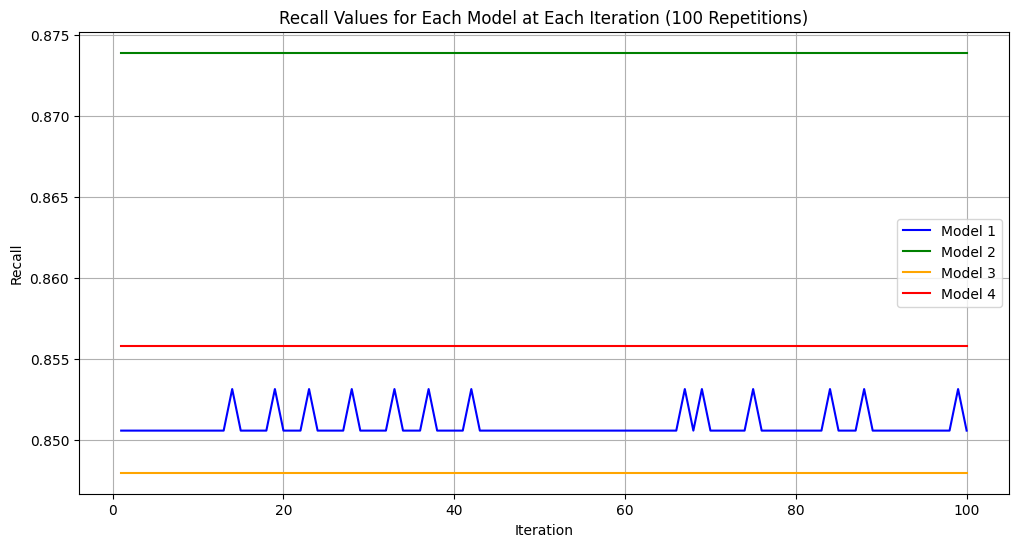

Model 1 average recall is  0.8505827505827506
Model 2 average recall is  0.8738927738927739
Model 3 average recall is  0.847985347985348
Model 4 average recall is  0.8557775557775559


In [120]:
# f)

avg_recall_scores_md1=[]
avg_recall_scores_md2=[]
avg_recall_scores_md3=[]
avg_recall_scores_md4=[]

for q in tqdm(range (100)):

    recall_scores_md1=[]
    recall_scores_md2=[]
    recall_scores_md3=[]
    recall_scores_md4=[]

    stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in stratified_kf.split(X, y):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        y_train=y_train.to_numpy().ravel()

        #################
        # Logit Model 1 #
        #################

        logit_md_1=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='liblinear', penalty='l1'))])
        logit_md_1.fit(X_train, y_train)

        y_pred_1=logit_md_1.predict_proba(X_test)[:, 1]
        y_pred_label_1=np.where(y_pred_1<0.1,0,1)
        md_1_recall=recall_score(y_test, y_pred_label_1)
        recall_scores_md1.append(md_1_recall)

        #################
        # Logit Model 2 #
        #################

        logit_md_2=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='liblinear', penalty='l2'))])
        logit_md_2.fit(X_train, y_train)

        y_pred_2=logit_md_2.predict_proba(X_test)[:, 1]
        y_pred_label_2=np.where(y_pred_2<0.1,0,1)
        md_2_recall=recall_score(y_test, y_pred_label_2)
        recall_scores_md2.append(md_2_recall)

        #################
        # Logit Model 3 #
        #################

        logit_md_3=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='saga', penalty='l1'))])
        logit_md_3.fit(X_train, y_train)

        y_pred_3=logit_md_3.predict_proba(X_test)[:, 1]
        y_pred_label_3=np.where(y_pred_3<0.1,0,1)
        md_3_recall=recall_score(y_test, y_pred_label_3)
        recall_scores_md3.append(md_3_recall)

        #################
        # Logit Model 4 #
        #################

        logit_md_4=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='saga', penalty='l2'))])
        logit_md_4.fit(X_train, y_train)

        y_pred_4=logit_md_4.predict_proba(X_test)[:, 1]
        y_pred_label_4=np.where(y_pred_4<0.1,0,1)
        md_4_recall=recall_score(y_test, y_pred_label_4)
        recall_scores_md4.append(md_4_recall)

    md_1_avg_recall=np.mean(recall_scores_md1)
    md_2_avg_recall=np.mean(recall_scores_md2)
    md_3_avg_recall=np.mean(recall_scores_md3)
    md_4_avg_recall=np.mean(recall_scores_md4)

    avg_recall_scores_md1.append(md_1_avg_recall)
    avg_recall_scores_md2.append(md_2_avg_recall)
    avg_recall_scores_md3.append(md_3_avg_recall)
    avg_recall_scores_md4.append(md_4_avg_recall)


plt.figure(figsize=(12, 6))
# Plot the results for Model 1
plt.plot(range(1, 101), avg_recall_scores_md1, label='Model 1', color='blue')
# Plot the results for Model 2
plt.plot(range(1, 101), avg_recall_scores_md2, label='Model 2', color='green')
# Plot the results for Model 3
plt.plot(range(1, 101), avg_recall_scores_md3, label='Model 3', color='orange')
# Plot the results for Model 4
plt.plot(range(1, 101), avg_recall_scores_md4, label='Model 4', color='red')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Recall Values for Each Model at Each Iteration (100 Repetitions)')
plt.legend()
plt.grid(True)
plt.show()

total_avg_recall_md1=np.mean(avg_recall_scores_md1) 
total_avg_recall_md2=np.mean(avg_recall_scores_md2) 
total_avg_recall_md3=np.mean(avg_recall_scores_md3) 
total_avg_recall_md4=np.mean(avg_recall_scores_md4) 

print("Model 1 average recall is ", md_1_avg_recall)
print("Model 2 average recall is ", md_2_avg_recall)
print("Model 3 average recall is ", md_3_avg_recall)
print("Model 4 average recall is ", md_4_avg_recall)

Based on the results, I would use the liblinear model with the penalty of l2 (Model 2)

Based on the results, I would use the saga model with the penalty of l2 (Model 4)

In [121]:
telecom_train.columns.tolist()

['International_plan', 'total_charge', 'Customer_service_calls', 'Churn']

In [136]:
# g)

recall_scores_liblin=[]

X_train=telecom_train.drop('Churn', axis=1)
y_train=telecom_train['Churn']
X_test=telecom_test.drop('Churn', axis=1)
y_test=telecom_test['Churn']

########################
# Best liblinear Model #
########################

liblin_md=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='liblinear', penalty='l2'))])
liblin_md.fit(X_train, y_train)
y_pred_liblin=liblin_md.predict_proba(X_test)[:, 1]
y_pred_label_liblin=np.where(y_pred_liblin<0.1,0,1)
liblin_md_recall=recall_score(y_test, y_pred_label_liblin)

######################
# Logit solver Model #
######################

solver_md=Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(solver='saga', penalty='l2'))])
solver_md.fit(X_train, y_train)

y_pred_solver=solver_md.predict_proba(X_test)[:, 1]
y_pred_label_solver=np.where(y_pred_solver<0.1,0,1)
solver_md_recall=recall_score(y_test, y_pred_label_solver)

if solver_md_recall > liblin_md_recall:
    print ("Because the solver model recall is ", solver_md_recall, "and the liblinear model recall is", liblin_md_recall, "\nI would use the solver model to predict Churn.")
elif solver_md_recall == liblin_md_recall:
    print ("The solver and liblinear model recall scores are equal, I'm not sure which model is better. Cant figure out why these two recall scores are coming out the same...")
else:
    print ("Because the liblinear model recall is ", liblin_md_recall, "and the solver model recall is", solver_md_recall, "\nI would use the liblinear model to predict Churn.")

The solver and liblinear model recall scores are equal, I'm not sure which model is better. Cant figure out why these two recall scores are coming out the same...
